In [1]:
#Library Import
import Bio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd

from matplotlib import cm

from scipy.spatial.distance import cdist
from numpy.random import permutation

import sys, csv 

import pandas as pd
import re

from Bio import SeqIO

import inspect
import seaborn as sns
import os



In [2]:
 #Define Dictionaries and parameters
    
Amino = {
     "A": "Ala",
     "R": "Arg",
     "N": "Asn",
     "D": "Asp",
     "C": "Cys",
     "Q": "Gln",
     "E": "Glu",
     "G": "Gly",
     "H": "His",
     "I": "Ile",
     "L": "Leu",
     "K": "Lys",
     "M": "Met",
     "F": "Phe",
     "P": "Pro",
     #"O": "Pyl",
     "S": "Ser",
     #"U": "Sec",
     "T": "Thr",
     "W": "Trp",
     "Y": "Tyr",
     "V": "Val",
     #"B": "Asx",
     #"Z": "Glx",
     #"J": "Xle",
     
 }
    

In [3]:
#Function Define


#Defining a function to read Fasta Files
def read_fasta(file_path, columns) :
    from Bio.SeqIO.FastaIO import SimpleFastaParser 
    with open(file_path) as fasta_file :  
        records = [] # create empty list
        for title, sequence in SimpleFastaParser(fasta_file): #SimpleFastaParser Iterate over Fasta records as string tuples. For each record a tuple of two strings is returned, the FASTA title line (without the leading ‘>’ character), and the sequence (with any whitespace removed). 
            record = []
            title_splits=re.findall(r"[\w']+", title) # Data cleaning is needed
          
                 
            
            record.append(title_splits[0])  #First values are ID (Append adds element to a list)
            record.append(len(sequence)) #Second values are sequences lengths
            sequence = "".join(sequence) #It converts into one line
            record.append(sequence)#Third values are sequences
            records.append(record)
    return pd.DataFrame(records, columns = columns) #We have created a function that returns a dataframe




In [4]:
#DESCRIBTION of all functions in this code

In [4]:
def convert_fastq_to_fasta(input_file, output_file):
    with open(input_file, 'r') as fastq_file, open(output_file, 'w') as fasta_file:
        while True:
            # Read four lines at a time from the FASTQ file
            header = fastq_file.readline().strip()
            sequence = fastq_file.readline().strip()
            plus_line = fastq_file.readline().strip()
            quality = fastq_file.readline().strip()

            # Break the loop if the end of the file is reached
            if not header:
                break

            # Write the header and sequence to the FASTA file
            fasta_file.write(f'>{header[1:]}\n')  # Remove the '@' symbol from the header
            fasta_file.write(f'{sequence}\n')


In [5]:

#convert fastaq to fasta
input_file = 'Pool_S1_L001_R1_001.fastq'  # Replace with your input FASTQ file path
output_file = 'output1.fasta'  # Replace with your output FASTA file path
convert_fastq_to_fasta(input_file, output_file)
print("File 1 susccefully converted to FASTA")

input_file = 'Pool_S1_L001_R2_001.fastq'  # Replace with your input FASTQ file path
output_file = 'output2.fasta'  # Replace with your output FASTA file path
convert_fastq_to_fasta(input_file, output_file)
print("File 2 susccefully converted to FASTA")



File 1 susccefully converted to FASTA
File 2 susccefully converted to FASTA


In [6]:
#convert fasta to text

 #File 1
fout = open('Data1.txt','w')
with open ('output1.fasta','r') as fin:
	for line in fin:
		if '>' not in line:
			fout.write(line)
fout.close()
print("File 1 susccefully converted to TXT")


 #File 1
fout = open('Data2.txt','w')
with open ('output2.fasta','r') as fin:
	for line in fin:
		if '>' not in line:
			fout.write(line)
fout.close()
print("File 2 susccefully converted to TXT")




File 1 susccefully converted to TXT
File 2 susccefully converted to TXT


In [7]:
#Merge to files

def merge_files(file1, file2, output_file):
    with open(file1, 'r') as f1, open(file2, 'r') as f2, open(output_file, 'w') as output:
        data1 = f1.read()
        data2 = f2.read()
        output.write(data1)
        output.write(data2)

        
        


merge_files('Data1.txt', 'Data2.txt', 'Data.txt')
print("Data1 and Data2 Merged susccefully : Data.txt")


Data1 and Data2 Merged susccefully : Data.txt


In [8]:
#Extracting Naive and Sorted

Naive_id = "TCAGTAAATTCTCTG"  
 
Sorted_id = "AGTACGGCTTTCAGA"

print (" NAIVE ID is  : ", Naive_id , "\n" , "SORTED ID is : ", Sorted_id)
                 

    
def Extract(Data_file , Sorted_id , Naive_id):
    output_Naive  = open("Naive.txt", "w")
    output_Sorted = open("Sorted.txt", "w")
    output_Extra  = open("Extra.txt", "w")
    
    with open(Data_file,"r") as In_file:
        for line in In_file:
            seq=line.strip()
            
            if seq.find(Naive_id) != -1:
                # Code for option Naive
                TagStart = seq.find(Naive_id) + len(Naive_id) +50
                sub=seq[TagStart:TagStart + 25]
                sub=seq #whole line
                output_Naive.write("%s\n" %sub)
                    
            elif seq.find(Sorted_id) != -1:
                # Code for option 2
                TagStart = seq.find(Sorted_id) + len(Sorted_id) +50
                sub=seq[TagStart:TagStart + 25]
                sub=seq #whole line
                output_Sorted.write("%s\n" %sub)
                    
                    
            else:
                # Default case
                sub=seq  #whole line   
                output_Extra.write("%s\n" %sub)
        
            
    output_Naive.close()
    output_Sorted.close()
    output_Extra.close()
    print ("Data seperated into Naive , Sorted , Extra")




        
Extract("Data.txt" , Sorted_id , Naive_id)       

 NAIVE ID is  :  TCAGTAAATTCTCTG 
 SORTED ID is :  AGTACGGCTTTCAGA
Data seperated into Naive , Sorted , Extra


In [9]:
# counting lines and checking acuracy:

def count_lines(file_path):
    with open(file_path, 'r') as file:
        line_count = sum(1 for _ in file)
    return line_count

#Usage:
Data_lines = count_lines("Data.txt")
Sorted_lines = count_lines("Sorted.txt")
Naive_lines = count_lines("Naive.txt")
Extra_lines = count_lines("Extra.txt")
Total = Sorted_lines + Naive_lines + Extra_lines

print(f"Number of Data lines: {Data_lines}")
print(f"Number of Total lines: {Total}")

if Data_lines == Total :
    print(f"Extraction is acurate, All lines are included in three files : Naive : {Naive_lines} , Sorted : {Sorted_lines}, Extra:{Extra_lines} ")
else :
    print(f"Some lines are missing")

print(f"(Naive + Sorted) : {((Sorted_lines + Naive_lines)/Total)* 100} % and Extra: {((Extra_lines)/Total)* 100}")


Number of Data lines: 2117512
Number of Total lines: 2117512
Extraction is acurate, All lines are included in three files : Naive : 298892 , Sorted : 524008, Extra:1294612 
(Naive + Sorted) : 38.86164517603679 % and Extra: 61.13835482396321


In [6]:
#Finding the seq (LPET LPKL And store them in two seperate files)

#find the LPET

LPET_Motif = "CTGCCGGAAACC"
LPKL_Motif = "CTGCCGAAACTG"


print ("Motif Seq for LPET is :", LPET_Motif)
print ("Motif Seq for LPKL is :", LPKL_Motif)


def Motif_search (in_file, out_file , Motif) :
    print ("Motif search in ",os.path.basename(in_file), "...")
    output_file = open(out_file, "w")
    with open(in_file,"r") as In_file:
        for line in In_file:
            if Motif in line:      
                seq=line.strip()
                TagStart = seq.find(Motif)
                sub=seq[TagStart:TagStart + 21]
                output_file.write("%s\n" %sub)
    output_file.close()
    print ("Done.")

    

#LPET
Motif_search("Naive.txt" ,"NaiveLPET.txt"  , LPET_Motif )
Motif_search("Sorted.txt","SortedLPET.txt" , LPET_Motif )

#LPKL
Motif_search("Naive.txt" ,"NaiveLPKL.txt"  , LPKL_Motif )
Motif_search("Sorted.txt","SortedLPKL.txt" , LPKL_Motif )









Motif Seq for LPET is : CTGCCGGAAACC
Motif Seq for LPKL is : CTGCCGAAACTG
Motif search in  Naive.txt ...
Done.
Motif search in  Sorted.txt ...
Done.
Motif search in  Naive.txt ...
Done.
Motif search in  Sorted.txt ...
Done.


In [11]:
#convert text to fasta again 

def Convert_TXT_to_Fasta (infile , outfile):
    fileInput = open(infile, "r")
    fileOutput = open(outfile, "w")
    #Seq counter
    count = 1 ;

    #Loop through each line in the input file
    print ("Converting", os.path.basename(infile) ," to FASTA...")
    for strLine in fileInput:
        if not strLine.isspace() :
            #Strip the endline character from each input line
            strLine = strLine.rstrip("\n")
    
            #Output the header
            fileOutput.write(">" + str(count) + "\n")
            fileOutput.write(strLine + "\n")

            count = count + 1
    print ("Done.")

    #Close the input and output file
    fileInput.close()
    fileOutput.close()



#LPET
Convert_TXT_to_Fasta("NaiveLPET.txt","NaiveLPET.fasta")
Convert_TXT_to_Fasta("SortedLPET.txt","SortedLPET.fasta")

#LPKL
Convert_TXT_to_Fasta("NaiveLPKL.txt","NaiveLPKL.fasta")
Convert_TXT_to_Fasta("SortedLPKL.txt","SortedLPKL.fasta")





Converting NaiveLPET.txt  to FASTA...
Done.
Converting SortedLPET.txt  to FASTA...
Done.
Converting NaiveLPKL.txt  to FASTA...
Done.
Converting SortedLPKL.txt  to FASTA...
Done.


In [13]:
#convert DNA Alphabet to Protein
#translate to protein

    #LPET
print ("Translating LPET Naive from DNA to Protein...")
from Bio.SeqRecord import SeqRecord
def translation(nuc):
	return SeqRecord(seq=nuc.seq.translate(), id = nuc.id)

from Bio import SeqIO
proteins = (translation(nuc_rec) for nuc_rec in SeqIO.parse("NaiveLPET.fasta",'fasta'))
SeqIO.write(proteins, 'ProtNaiveLPET.fasta','fasta')
print ("Done.")

print ("Translating LPET Sorted from DNA to Protein...")
from Bio.SeqRecord import SeqRecord
def translation(nuc):
	return SeqRecord(seq=nuc.seq.translate(), id = nuc.id)

from Bio import SeqIO
proteins = (translation(nuc_rec) for nuc_rec in SeqIO.parse("SortedLPET.fasta",'fasta'))
SeqIO.write(proteins, 'ProtSortedLPET.fasta','fasta')
print ("Done.")







    #LPKL
print ("Translating LPKL Naive from DNA to Protein...")
from Bio.SeqRecord import SeqRecord
def translation(nuc):
	return SeqRecord(seq=nuc.seq.translate(), id = nuc.id)

from Bio import SeqIO
proteins = (translation(nuc_rec) for nuc_rec in SeqIO.parse("NaiveLPKL.fasta",'fasta'))
SeqIO.write(proteins, 'ProtNaiveLPKL.fasta','fasta')
print ("Done.")

print ("Translating LPKL Sorted from DNA to Protein...")
from Bio.SeqRecord import SeqRecord
def translation(nuc):
	return SeqRecord(seq=nuc.seq.translate(), id = nuc.id)

from Bio import SeqIO
proteins = (translation(nuc_rec) for nuc_rec in SeqIO.parse("SortedLPKL.fasta",'fasta'))
SeqIO.write(proteins, 'ProtSortedLPKL.fasta','fasta')
print ("Done.")



Translating LPET Naive from DNA to Protein...
Done.
Translating LPET Sorted from DNA to Protein...
Done.
Translating LPKL Naive from DNA to Protein...
Done.
Translating LPKL Sorted from DNA to Protein...
Done.


In [264]:
#filtering peptides with stop codon

def Filterstop(Fin , Fout):
    print ("Removing peptides with stop codon in :", os.path.basename(Fin) ," ...")
    fout=open(Fout,'w')

    with open(Fin ,'r') as fin:
        for line in fin:
            line=line.strip()
            if '*'not in line:
                fout.write("%s\n" %(line))
    fout.close()
    print ("Done.")

    
Filterstop("ProtNaiveLPET.fasta" , "ProtNaiveLPET2.fasta")
Filterstop("ProtSortedLPET.fasta" , "ProtSortedLPET2.fasta")

Filterstop("ProtNaiveLPKL.fasta" , "ProtNaiveLPKL2.fasta")
Filterstop("ProtSortedLPKL.fasta", "ProtSortedLPKL2.fasta")




Removing peptides with stop codon in : ProtNaiveLPET.fasta  ...
Done.
Removing peptides with stop codon in : ProtSortedLPET.fasta  ...
Done.
Removing peptides with stop codon in : ProtNaiveLPKL.fasta  ...
Done.
Removing peptides with stop codon in : ProtSortedLPKL.fasta  ...
Done.


In [7]:
#show and store All data in data frame :
dataLPET_naive  = read_fasta("ProtNaiveLPET2.fasta", columns=["id","sequence_length", "sequence"])
dataLPET_sorted = read_fasta("ProtSortedLPET2.fasta", columns=["id","sequence_length", "sequence"])
dataLPKL_naive  = read_fasta("ProtNaiveLPKL2.fasta", columns=["id","sequence_length", "sequence"])
dataLPKL_sorted = read_fasta("ProtSortedLPKL2.fasta", columns=["id","sequence_length", "sequence"])

dataLPET_naive

,id,sequence_length,sequence
0,1,7,LPETFER
1,2,0,
2,3,7,LPETSSM
3,4,0,
4,5,7,LPETPWE
...,...,...,...
136688,136689,7,LPETKCH
136689,136690,0,
136690,136691,7,LPETWQQ
136691,136692,7,LPETKCH


In [71]:
#remove short sequences and NAN values

def dataclean (Dataframein):

    filtered_df = Dataframein[Dataframein['sequence_length'] == 7]

    filtered_df['sequence'].replace('', np.nan, inplace=True)
    filtered_df['sequence'].replace('LPETXXX', np.nan, inplace=True)
    filtered_df['sequence'].replace('LPETGWX', np.nan, inplace=True)
    filtered_df.dropna(subset=['sequence'], inplace=True)
    filtered_df.dropna(subset=['sequence_length'], inplace=True)
    return filtered_df


#LPET
dataLPET_naive1= dataclean(dataLPET_naive)
dataLPET_sorted1= dataclean(dataLPET_sorted)

dataLPET_naive= dataLPET_naive1
dataLPET_sorted= dataLPET_sorted1

del dataLPET_naive1
del dataLPET_sorted1


#LPKL
dataLPKL_naive1= dataclean(dataLPKL_naive)
dataLPKL_sorted1 = dataclean(dataLPKL_sorted)

dataLPKL_naive = dataLPKL_naive1
dataLPKL_sorted= dataLPKL_sorted1
del dataLPKL_naive1
del dataLPKL_sorted1


dataLPKL_sorted

,id,sequence_length,sequence
0,1,7,LPKLPRT
1,2,7,LPKLPRT
2,3,7,LPKLPTT
3,4,7,LPKLPRT
4,5,7,LPKLPTT
...,...,...,...
8229,8230,7,LPKLKNN
8230,8231,7,LPKLPKT
8231,8232,7,LPKLPEN
8232,8233,7,LPKLEKN


In [56]:
#grouping in order to count each sequenc repeats the data

dfntempLPET = dataLPET_naive.loc[:, ['sequence_length' , 'sequence']]
dfstempLPET = dataLPET_sorted.loc[:, ['sequence_length' , 'sequence']]
dfntempLPKL = dataLPKL_naive.loc[:, ['sequence_length' , 'sequence']]
dfstempLPKL = dataLPKL_sorted.loc[:, ['sequence_length' , 'sequence']]


df_naive_LPET = dfntempLPET.groupby(dfntempLPET.columns.tolist(), as_index=False).size()
df_naive_LPET.sort_values(by= "size", ascending= False, inplace=True)

df_sorted_LPET = dfstempLPET.groupby(dfstempLPET.columns.tolist(), as_index=False).size()
df_sorted_LPET.sort_values(by= "size", ascending= False, inplace=True)

df_naive_LPKL = dfntempLPKL.groupby(dfntempLPKL.columns.tolist(), as_index=False).size()
df_naive_LPKL.sort_values(by= "size", ascending= False, inplace=True)

df_sorted_LPKL = dfstempLPKL.groupby(dfstempLPKL.columns.tolist(), as_index=False).size()
df_sorted_LPKL.sort_values(by= "size", ascending= False, inplace=True)


#deleting temp dataframes to free ram space
del dfntempLPET
del dfstempLPET
del dfntempLPKL
del dfstempLPKL



df_naive_LPET.shape[0]

7436

In [60]:
#Filtering 
#create a new dataframe 
df_sorted_LPKLf = df_sorted_LPKL
df_sorted_LPKLf["p1 '"] = df_sorted_LPKLf["sequence"].astype(str).str[4]
df_sorted_LPKLf["p3 '"] = df_sorted_LPKLf["sequence"].astype(str).str[6]

# Remove rows with 'P' in column 'P1''

df_sorted_LPKL_filtered = df_sorted_LPKLf[( df_sorted_LPKLf["p1 '"] != 'P' ) | (df_sorted_LPKLf["p3 '"] != 'T')]
del df_sorted_LPKLf
df_sorted_LPKL_filtered = df_sorted_LPKL_filtered.drop(["p1 '" , "p3 '"], axis=1)
df_sorted_LPKL_filtered #filtered dataframe


#for naive
#create a new dataframe 
df_naive_LPKLf = df_naive_LPKL
df_naive_LPKLf["p1 '"] = df_naive_LPKLf["sequence"].astype(str).str[4]
df_naive_LPKLf["p3 '"] = df_naive_LPKLf["sequence"].astype(str).str[6]

# Remove rows with 'P' in column 'P1''

df_naive_LPKL_filtered = df_naive_LPKLf[( df_naive_LPKLf["p1 '"] != 'P' ) | (df_naive_LPKLf["p3 '"] != 'T')]
del df_naive_LPKLf
df_naive_LPKL_filtered = df_naive_LPKL_filtered.drop(["p1 '" , "p3 '"], axis=1)
df_naive_LPKL_filtered #filtered dataframe

df_naive_LPKL_filtered



,sequence_length,sequence,size
4528,7,LPKLNNK,266
4468,7,LPKLNKK,226
3332,7,LPKLKNK,183
3272,7,LPKLKKK,153
3392,7,LPKLKRK,151
...,...,...,...
7505,7,LPKLYCQ,1
1102,7,LPKLDVY,1
382,7,LPKLAYF,1
7262,7,LPKLWLA,1


In [61]:
# Enrichment

def Enrichment (df_naive , df_sorted, outfile):
    df1= df_naive.drop(['sequence_length'], axis=1)
    df2= df_sorted.drop(['sequence_length'], axis=1)
    
    # Merge dataframes with left join
    merged_df = pd.merge(df1, df2, on='sequence', how='outer')
    # Replace NaN values with 1 in the 'size_x' column
    merged_df['size_x'] = merged_df['size_x'].fillna(1)

    # Replace NaN values with 1 in the 'size_x' column
    merged_df['size_y'] = merged_df['size_y'].fillna(0)
    #rename
    merged_df.rename(columns = {'size_x':'Naive' , 'size_y':'Sorted'}, inplace = True)
    #enrichment ratio
    merged_df ["Enrichment Ratio"] = merged_df ["Sorted"] / merged_df ["Naive"]
    merged_df ["Log Enrichment Ratio"] =np.log(merged_df ["Enrichment Ratio"])
    merged_df ["Enrichment Formula"] = (merged_df ["Sorted"] / df2.shape[0]) / (merged_df ["Naive"]/df1.shape[0]) - 1
    merged_df ["Log Enrichment Formula"] =np.log(merged_df ["Enrichment Formula"])
    
    #save tofile
    
    merged_df.sort_values(by= "Enrichment Ratio", ascending= False, inplace=True)
    outdf = merged_df
    outdf.to_csv(outfile, index=True)
    print("NGS Enrichment Analysis done sucsesfully.")
    return outdf
    
    
LPETEnrichment = Enrichment (df_naive_LPET, df_sorted_LPET,'NGS Analysis Table LPET.csv')
LPKLEnrichment = Enrichment (df_naive_LPKL, df_sorted_LPKL,'NGS Analysis Table LPKL.csv')
LPKLEnrichment_filter = Enrichment (df_naive_LPKL_filtered, df_sorted_LPKL_filtered,'NGS Analysis Table LPKL_Filtered LPKLPXT.csv')


NGS Enrichment Analysis done sucsesfully.
NGS Enrichment Analysis done sucsesfully.
NGS Enrichment Analysis done sucsesfully.


/home/s.ajayebi/.conda/envs/nimaenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s.ajayebi/.conda/envs/nimaenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s.ajayebi/.conda/envs/nimaenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s.ajayebi/.conda/envs/nimaenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s.ajayebi/.conda/envs/nimaenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s.ajay

In [12]:
LPKLEnrichment_filter

,sequence,Naive,Sorted,Enrichment Ratio,Log Enrichment Ratio,Enrichment Formula,Log Enrichment Formula
6643,LPKLRQH,4.0,39.0,9.750000,2.277267,59.010563,4.077716
5701,LPKLPGA,6.0,32.0,5.333333,1.673976,31.826291,3.460293
4410,LPKLGPM,9.0,47.0,5.222222,1.652923,31.142410,3.438571
6273,LPKLAAE,5.0,25.0,5.000000,1.609438,29.774648,3.393657
1940,LPKLPDS,19.0,93.0,4.894737,1.588161,29.126761,3.371657
...,...,...,...,...,...,...,...
3153,LPKLKQI,13.0,0.0,0.000000,-inf,-1.000000,NaN
3152,LPKLQLM,13.0,0.0,0.000000,-inf,-1.000000,NaN
3151,LPKLLTC,13.0,0.0,0.000000,-inf,-1.000000,NaN
3149,LPKLLPE,13.0,0.0,0.000000,-inf,-1.000000,NaN


In [62]:
#spliting the seq and puting seq letter in a new column


LPKL = LPKLEnrichment.drop(['Log Enrichment Ratio' , "Enrichment Formula" , "Log Enrichment Formula"], axis=1)
LPET = LPETEnrichment.drop(['Log Enrichment Ratio' , "Enrichment Formula" , "Log Enrichment Formula"], axis=1)
LPKL_filter = LPKLEnrichment_filter.drop(['Log Enrichment Ratio' , "Enrichment Formula" , "Log Enrichment Formula"], axis=1)


LPKL["p1 '"] = LPKL["sequence"].astype(str).str[4]
LPKL["p2 '"] = LPKL["sequence"].astype(str).str[5]
LPKL["p3 '"] = LPKL["sequence"].astype(str).str[6]

LPET["p1 '"] = LPET["sequence"].astype(str).str[4]
LPET["p2 '"] = LPET["sequence"].astype(str).str[5]
LPET["p3 '"] = LPET["sequence"].astype(str).str[6]

LPKL_filter["p1 '"] = LPKL_filter["sequence"].astype(str).str[4]
LPKL_filter["p2 '"] = LPKL_filter["sequence"].astype(str).str[5]
LPKL_filter["p3 '"] = LPKL_filter["sequence"].astype(str).str[6]



LPKL_filter

,sequence,Naive,Sorted,Enrichment Ratio,p1 ',p2 ',p3 '
6624,LPKLRQH,4.0,39.0,9.750000,R,Q,H
5682,LPKLPGA,6.0,32.0,5.333333,P,G,A
4393,LPKLGPM,9.0,47.0,5.222222,G,P,M
6254,LPKLAAE,5.0,25.0,5.000000,A,A,E
1932,LPKLPDS,19.0,93.0,4.894737,P,D,S
...,...,...,...,...,...,...,...
3147,LPKLKWW,13.0,0.0,0.000000,K,W,W
3146,LPKLHGF,13.0,0.0,0.000000,H,G,F
3145,LPKLFYL,13.0,0.0,0.000000,F,Y,L
3144,LPKLAIS,13.0,0.0,0.000000,A,I,S


In [68]:
#creating a dataframe for prime positions with counting of aminos Naive


def count_position (indf , mode ):
    d = pd.DataFrame()

    for ii in Amino.keys():
        temp = pd.DataFrame(
            {
                "p1'": indf[indf["p1 '"] == ii][mode].sum(), 
                "p2'": indf[indf["p2 '"] == ii][mode].sum(), 
                "p3'": indf[indf["p3 '"] == ii][mode].sum(),
            } , index= [ii]
        )

        d = pd.concat([d, temp])
        
    return d


#LPET
dn1 = count_position(LPET , "Naive" )
ds1 = count_position(LPET , "Sorted" )

#LPKL
dn2 = count_position(LPKL , "Naive" )
ds2 = count_position(LPKL , "Sorted" )

#LPKL_Filtered
dn2new = count_position(LPKL_filter , "Naive" )
ds2new = count_position(LPKL_filter, "Sorted" )



# Divide DataFrames using the `/` operator Enrichment Ratio
    #LPET POSITIONS 
LPET_POS = ds1/dn1
    #LPKL POSITIONS 
LPKL_POS = ds2/dn2
    #LPKL POSITIONS_Filtered
LPKL_POS_filter = ds2new/dn2new


#Save to files

LPET_POS.to_csv('Prime positions Table Enrichment Ratio LPET.csv', index=True)
LPKL_POS.to_csv('Prime positions Table Enrichment Ratio LPKL.csv', index=True)
LPKL_POS_filter.to_csv('Prime positions Table Enrichment Ratio LPKL_FilteredLPKLPXT.csv', index=True)


#Print 
print("Enrichment files created sucsesfully")

LPKL_POS

Enrichment files created sucsesfully


,p1',p2',p3'
A,0.025699,0.058999,0.053474
R,0.030108,0.100264,0.014676
N,0.028092,0.159146,0.017317
D,0.028039,0.145277,0.015597
C,0.009744,0.041101,0.035680
Q,0.017645,0.083518,0.017139
E,0.026174,0.046950,0.019888
G,0.025641,0.040411,0.014545
H,0.036126,0.114746,0.025259
I,0.042435,0.030621,0.027007


In [69]:
LPKL_POS_filter

,p1',p2',p3'
A,0.025699,0.024090,0.053474
R,0.030108,0.022789,0.014676
N,0.028092,0.060163,0.017317
D,0.028039,0.094781,0.015597
C,0.009744,0.018830,0.035680
Q,0.017645,0.023680,0.017139
E,0.026174,0.034624,0.019888
G,0.025641,0.021228,0.014545
H,0.036126,0.020403,0.025259
I,0.042435,0.022494,0.027007


# Summery Table

In [16]:
#Sumerry table

data_sum_NGS = {'Sequence': ["LPETXXX", "LPKLXXX"],
        'Naive Library unique sequences':  [df_naive_LPET.shape[0] ,df_naive_LPKL.shape[0] ],
        'Sorted Library unique sequences': [df_sorted_LPET.shape[0],df_sorted_LPKL.shape[0] ]
           }
Sum_NGS = pd.DataFrame(data_sum_NGS)
Sum_NGS.to_csv('Summery Table.csv', index=False)

Sum_NGS


,Sequence,Naive Library unique sequences,Sorted Library unique sequences
0,LPETXXX,7436,4261
1,LPKLXXX,7866,1298


# Creating plots

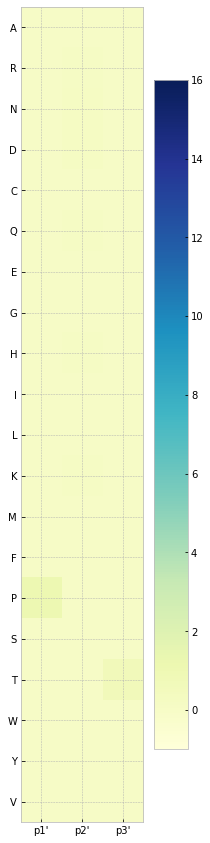

In [50]:
# Displaying dataframe as an heatmap LPKL
# with diverging colourmap as YlGnBu
plt.figure(figsize=(4,15))

plt.imshow(LPKL_POS, cmap ="YlGnBu" ,  vmin=-1,vmax=16)
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(3), LPKL_POS.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(LPKL_POS)), LPKL_POS.index)

plt.savefig('Prime positions Heatmap LPKL.png')

# Displaying the figure
plt.show()



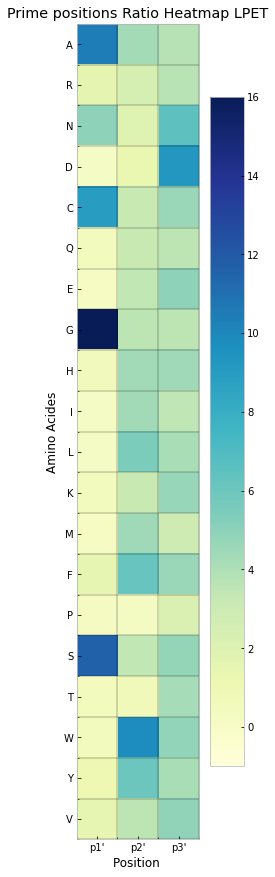

In [54]:

# Displaying dataframe as an heatmap LPET

# with diverging colourmap as YlGnBu
plt.figure(figsize=(4,15))



plt.grid(which="minor", color="w", linestyle='-', linewidth=3)
    
plt.imshow(LPET_POS, cmap ="YlGnBu", vmin=-1, vmax=16)
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
plt.xlabel('Position ')
# according to dataframe
plt.xticks(range(3), LPET_POS.columns)
  
plt.grid(False)
    # Move the grid lines
plt.gca().set_xticks(np.arange(-0.5, 3, 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, 20, 1), minor=True)
plt.grid(which='minor', color='black', linewidth=0.3)
# Assigning labels of y-axis 
plt.ylabel('Amino Acides')
plt.title('Prime positions Ratio Heatmap LPET')


# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(LPET_POS)), LPET_POS.index)

plt.savefig('Prime positions Heatmap LPETXXX.png', dpi=100)

# Displaying the figure
plt.show()

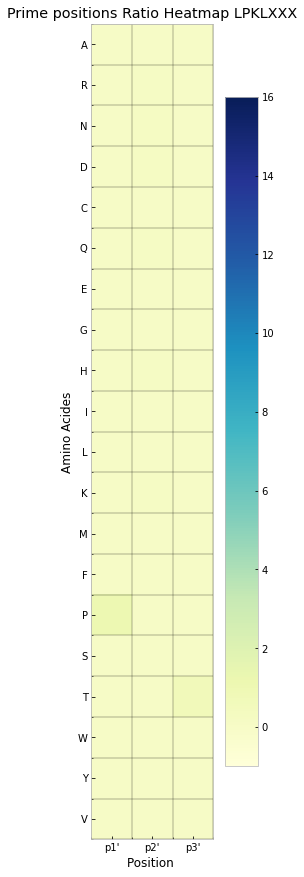

In [53]:

# Displaying dataframe as an heatmap LPKL

# with diverging colourmap as YlGnBu
plt.figure(figsize=(4,15))



plt.grid(which="minor", color="w", linestyle='-', linewidth=3)
    
plt.imshow(LPKL_POS, cmap ="YlGnBu", vmin=-1, vmax=16)
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
plt.xlabel('Position ')
# according to dataframe
plt.xticks(range(3), LPKL_POS.columns)
  
plt.grid(False)
    # Move the grid lines
plt.gca().set_xticks(np.arange(-0.5, 3, 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, 20, 1), minor=True)
plt.grid(which='minor', color='black', linewidth=0.3)
# Assigning labels of y-axis 
plt.ylabel('Amino Acides')
plt.title('Prime positions Ratio Heatmap LPKLXXX')


# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(LPKL_POS)), LPKL_POS.index)

plt.savefig('Prime positions Heatmap LPKL.png', dpi=100)

# Displaying the figure
plt.show()

In [25]:
#creating a dataframe for prime positions with counting of aminos Naive and Enrichment formula


#LPET
dn1 = count_position(LPET , "Naive" )
ds1 = count_position(LPET , "Sorted" )

#LPLPKL
dn2 = count_position(LPKL , "Naive" )
ds2 = count_position(LPKL , "Sorted" )





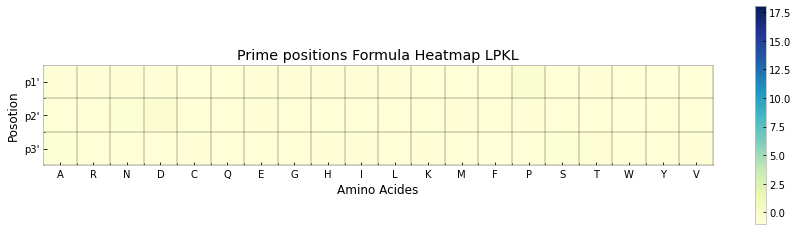

In [42]:

# Displaying dataframe as an heatmap LPKL

# with diverging colourmap as YlGnBu
plt.figure(figsize=(15,4))



plt.grid(which="minor", color="w", linestyle='-', linewidth=3)
    
plt.imshow(LPKL_POSF_filter, cmap ="YlGnBu", vmin=-1,vmax=18)
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
plt.xlabel('Amino Acides')
# according to dataframe
plt.xticks(range(20), LPKL_POSF_filter.columns)
  
plt.grid(False)
    # Move the grid lines
plt.gca().set_xticks(np.arange(-0.5, 20, 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, 3, 1), minor=True)
plt.grid(which='minor', color='black', linewidth=0.3)
# Assigning labels of y-axis 
plt.ylabel('Posotion')
plt.title('Prime positions Formula Heatmap LPKL')


# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(LPKL_POSF_filter)), LPKL_POSF_filter.index)

plt.savefig('Prime positions Formula Heatmap LPKL.png', dpi=100)

# Displaying the figure
plt.show()

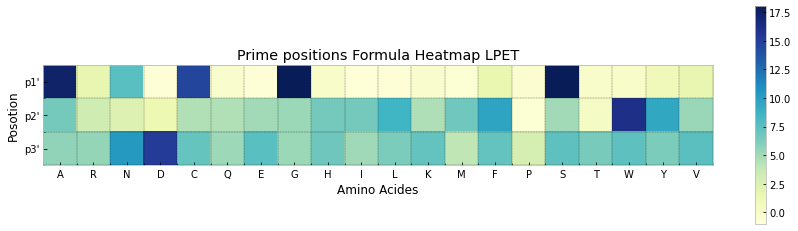

In [41]:
# Displaying dataframe as an heatmap LPET
# with diverging colourmap as YlGnBu
plt.figure(figsize=(15,4))

plt.imshow(LPET_POSF, cmap ="YlGnBu", vmin=-1,vmax=18)
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()

# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(20), LPET_POSF.columns)

plt.xlabel('Amino Acides')
plt.grid(False)
    # Move the grid lines
plt.gca().set_xticks(np.arange(-0.5, 20, 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, 3, 1), minor=True)
plt.grid(which='minor', color='black', linewidth=0.3)
# Assigning labels of y-axis 
plt.ylabel('Posotion')
plt.title('Prime positions Formula Heatmap LPET')


# according to dataframe
plt.yticks(range(len(LPET_POSF)), LPET_POSF.index)

plt.savefig('Prime positions Formula Heatmap LPET.png', dpi=100)
# Displaying the figure
plt.show()


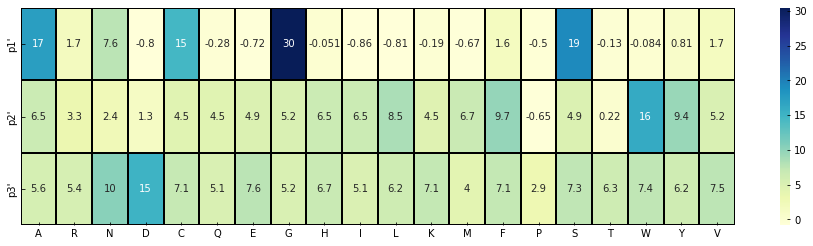

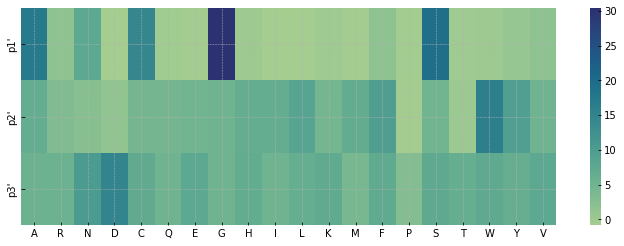

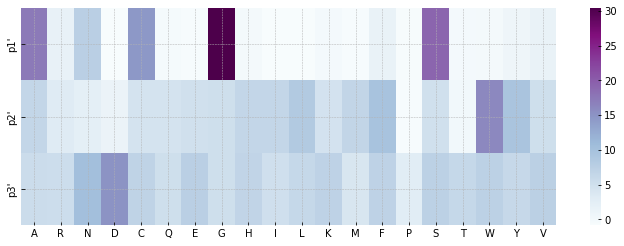

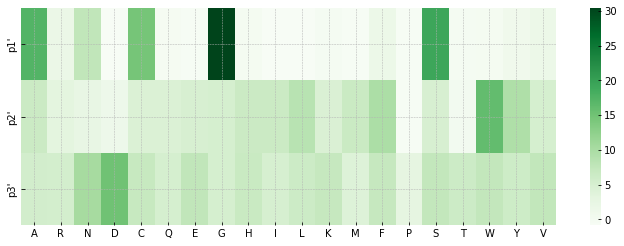

In [43]:
#creat a heatmap with seaborn package
d = LPET_POSF
# plot using a color palette
fig, ax = plt.subplots(figsize=(16, 4))
plt.grid(False)
sns.heatmap(d, cmap="YlGnBu", annot =True,fmt='.2g' , linewidths=.1 , linecolor="Black")
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(d, cmap="crest")
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(d, cmap="BuPu")
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(d, cmap="Greens")
plt.show()

## Heatmap

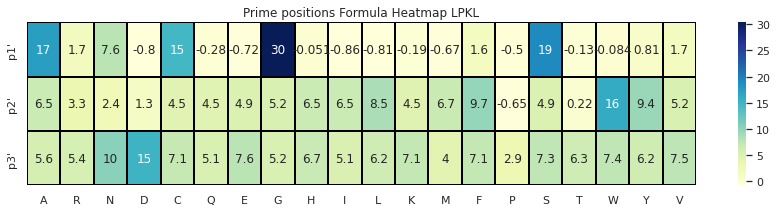

In [150]:
def create_and_save_HeatMap(d, save_path, titl):
    fig, ax = plt.subplots(figsize=(15, 3))
    plt.grid(False)
    plt.title('Prime positions Formula Heatmap LPKL')
    sns.heatmap(d, cmap="YlGnBu", annot =True,fmt='.2g' , linewidths=.1 , linecolor="Black")


     #Assigning labels of y-axis 
   # plt.ylabel('Posotion')
# according to dataframe
    #plt.yticks(range(len(d)), d.index)
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    #plt.close()

create_and_save_HeatMap(LPET_POSF , "Prime positions TEST.png" , "Prime positions TEST")

## Pie chart

In [151]:
def create_and_save_piechart(data, labels, save_path, titl):
    fig1, ax1 = plt.subplots(figsize=(10, 10))
    fig1.subplots_adjust(0,0.2,1,1) #position of pie chart

    colors = sns.color_palette('deep')[0:6]
    explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]

    ax1.pie(data, labels = labels, colors = colors, explode=explode, autopct=None)
    total = sum(data)
    ax1.axis('equal')
    ax1.legend(title="Amino Acides",
        loc='best',
        labels=['%s: %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(labels, data)],
        prop={'size': 12},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )
    plt.title(titl)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

    
    
# Example usage:
data = LPET_POS.iloc[0]  # Data values
labels = LPET_POS.columns  # Labels for the pie chart
save_path = 'piechart.png'  # File path to save the chart




#Enrichment Ratio
    #p1'
create_and_save_piechart(LPET_POS.iloc[0], LPET_POS.columns, 'LPET_Ratio_piechart_p1.png', " P1' Amino acides enrichment ratio in LPET")
create_and_save_piechart(LPKL_POS.iloc[0], LPKL_POS.columns, 'LPKL_Ratio_piechart_p1.png', " P1' Amino acides enrichment ratio in LPKL")
create_and_save_piechart(LPKL_POS_filter.iloc[0], LPKL_POS_filter.columns, 'LPEKL_Ratio_Filtered_piechart_p1.png', " P1' Amino acides enrichment ratio in LPKL")
    #p2'
create_and_save_piechart(LPET_POS.iloc[1], LPET_POS.columns, 'LPET_Ratio_piechart_p2.png', " P2' Amino acides enrichment ratio in LPET")
create_and_save_piechart(LPKL_POS.iloc[1], LPKL_POS.columns, 'LPKL_Ratio_piechart_p2.png', " P2' Amino acides enrichment ratio in LPKL")
create_and_save_piechart(LPKL_POS_filter.iloc[1], LPKL_POS_filter.columns, 'LPEKL_Ratio_Filtered_piechart_p2.png', " P1' Amino acides enrichment ratio in LPKL")
    #p3'
create_and_save_piechart(LPET_POS.iloc[2], LPET_POS.columns, 'LPET_Ratio_piechart_p3.png', " P3' Amino acides enrichment ratio in LPET")
create_and_save_piechart(LPKL_POS.iloc[2], LPKL_POS.columns, 'LPKL_Ratio_piechart_p3.png', " P3' Amino acides enrichment ratio in LPKL")
create_and_save_piechart(LPKL_POS_filter.iloc[2], LPKL_POS_filter.columns, 'LPEKL_Ratio_Filtered_piechart_p3.png', " P3' Amino acides enrichment ratio in LPKL")


In [155]:
testdata = LPET_POSF
testdata[testdata < 0] = 0  # Replace negative values with zero
testdata

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V
p1',17.275946,1.720404,7.598816,0.000000,14.543813,0.000000,0.000000,30.418887,0.000000,0.000000,0.000000,0.000000,0.000000,1.587319,0.000000,19.215172,0.000000,0.000000,0.805271,1.651457
p2',6.518299,3.293594,2.358224,1.300969,4.479940,4.450115,4.937276,5.202870,6.528011,6.530996,8.532650,4.521793,6.691446,9.666839,0.000000,4.943021,0.221252,16.104993,9.420900,5.245639
p3',5.586777,5.444643,10.306539,15.133757,7.078722,5.135085,7.575887,5.176380,6.732447,5.077606,6.232892,7.107932,4.033792,7.091023,2.893823,7.333557,6.345219,7.381216,6.216479,7.503136


In [181]:
LPKL_POSF.iloc[1]

A   -0.642462
R   -0.392393
N   -0.035560
D   -0.119607
C   -0.750922
Q   -0.493876
E   -0.715478
G   -0.755105
H   -0.304629
I   -0.814434
L   -0.900867
K   -0.456237
M   -0.842322
F   -0.895727
P   -0.805824
S   -0.718176
T   -0.740937
W   -0.911880
Y   -0.882940
V   -0.697980
Name: p2', dtype: float64

In [179]:
datas = LPET_POSF.iloc[0]
non_zero_datas = [value for value in datas if value > 0]
non_zero_datas

[17.275946484682663,
 1.7204043364441057,
 7.598816183875096,
 14.543813039626679,
 30.41888680456002,
 1.58731861213843,
 19.215172232534727,
 0.8052709853318105,
 1.6514567717067425]

In [180]:
#Enrichment Formula
def create_and_save_piechartf(data, labels, save_path, titl):
    non_zero_data = [value for value in data if value > 0]
    non_zero_labels = [label for value, label in zip(data, labels) if value > 0]
    All_label= [label for value, label in zip(data, labels)]
    #positive_data=data
    #positive_data[positive_data < 0] = 0  # Replace negative values with zero
    fig1, ax1 = plt.subplots(figsize=(10, 10))
    fig1.subplots_adjust(0,0.2,1,1) #position of pie chart

    colors = sns.color_palette('deep')[0:6]
    explode = [0.02 if value > 0 else 0 for value in non_zero_data]
    #explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]

    ax1.pie(non_zero_data, labels = non_zero_labels, colors = colors, explode=explode, autopct=None)
    total = sum(non_zero_data)
    ax1.axis('equal')
    ax1.legend(title="Amino Acides",
        loc='best',
        labels=['%s: %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(All_label, non_zero_data)],
        prop={'size': 12},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )
    plt.title(titl)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

    
    


#Enrichment Formula
    #p1'
create_and_save_piechartf(LPET_POSF.iloc[0], LPET_POSF.columns, 'LPET_Formula_piechart_p1.png', " P1' Amino acides enrichment formula in LPET")
create_and_save_piechartf(LPKL_POSF.iloc[0], LPKL_POSF.columns, 'LPKL_Formula_piechart_p1.png', " P1' Amino acides enrichment formula in LPKL")
create_and_save_piechartf(LPKL_POSF_filter.iloc[0], LPKL_POSF_filter.columns, 'LPEKL_Formula_Filtered_piechart_p1.png', " P1' Amino acides enrichment formula in LPKL")
    #p2'
create_and_save_piechartf(LPET_POSF.iloc[1], LPET_POSF.columns, 'LPET_Formula_piechart_p2.png', " P2' Amino acides enrichment formula in LPET")
create_and_save_piechartf(LPKL_POSF.iloc[1], LPKL_POSF.columns, 'LPKL_Formula_piechart_p2.png', " P2' Amino acides enrichment formula in LPKL")
create_and_save_piechartf(LPKL_POSF_filter.iloc[1], LPKL_POSF_filter.columns, 'LPEKL_Formula_Filtered_piechart_p2.png', " P1' Amino acides enrichment formula in LPKL")
    #p3'
create_and_save_piechartf(LPET_POSF.iloc[2], LPET_POSF.columns, 'LPET_Formula_piechart_p3.png', " P3' Amino acides enrichment formula in LPET")
create_and_save_piechartf(LPKL_POSF.iloc[2], LPKL_POSF.columns, 'LPKL_Formula_piechart_p3.png', " P3' Amino acides enrichment formula in LPKL")
create_and_save_piechartf(LPKL_POSF_filter.iloc[2], LPKL_POSF_filter.columns, 'LPEKL_Formula_Filtered_piechart_p3.png', " P3' Amino acides enrichment formula in LPKL")


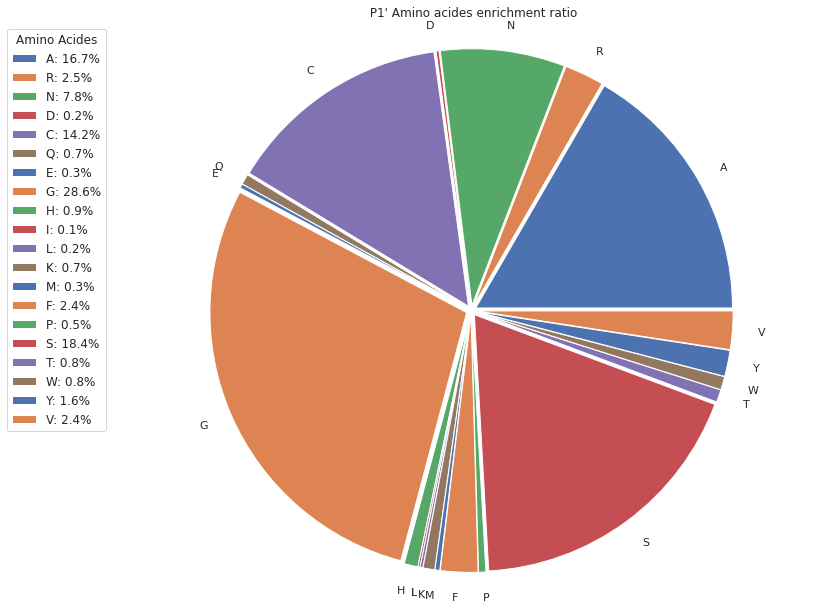

In [110]:
#test 
data = LPET_POS.iloc[0]
labels = LPET_POS.columns

fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1.subplots_adjust(0,0.2,1,1) #position of pie chart

colors = sns.color_palette('deep')[0:6]
explode = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]

ax1.pie(data, labels = labels, colors = colors, explode=explode, autopct=None)
total = sum(data)
ax1.axis('equal')
ax1.legend(title="Amino Acides",
    loc='best',
    labels=['%s: %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, data)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title(" P1' Amino acides enrichment ratio")
plt.savefig("testttt.png", bbox_inches='tight')


In [232]:
LPETEnrichment

,sequence,Naive,Sorted,Enrichment Ratio,Log Enrichment Ratio,Enrichment Formula,Log Enrichment Formula
6213,LPETCFD,2.0,1132.0,566.000000,6.338594,986.413089,6.894075
7153,LPETGIP,1.0,413.0,413.000000,6.023448,719.497537,6.578553
7143,LPETGKC,1.0,303.0,303.000000,5.713733,527.597467,6.268334
4984,LPETGYC,4.0,1195.0,298.750000,5.699607,520.183146,6.254181
5299,LPETAMA,3.0,754.0,251.333333,5.526780,437.462585,6.080991
...,...,...,...,...,...,...,...
4834,LPETMDA,4.0,0.0,0.000000,-inf,-1.000000,NaN
4836,LPETDAK,4.0,0.0,0.000000,-inf,-1.000000,NaN
4839,LPETHEQ,4.0,0.0,0.000000,-inf,-1.000000,NaN
4840,LPETHEK,4.0,0.0,0.000000,-inf,-1.000000,NaN


## TOP 10



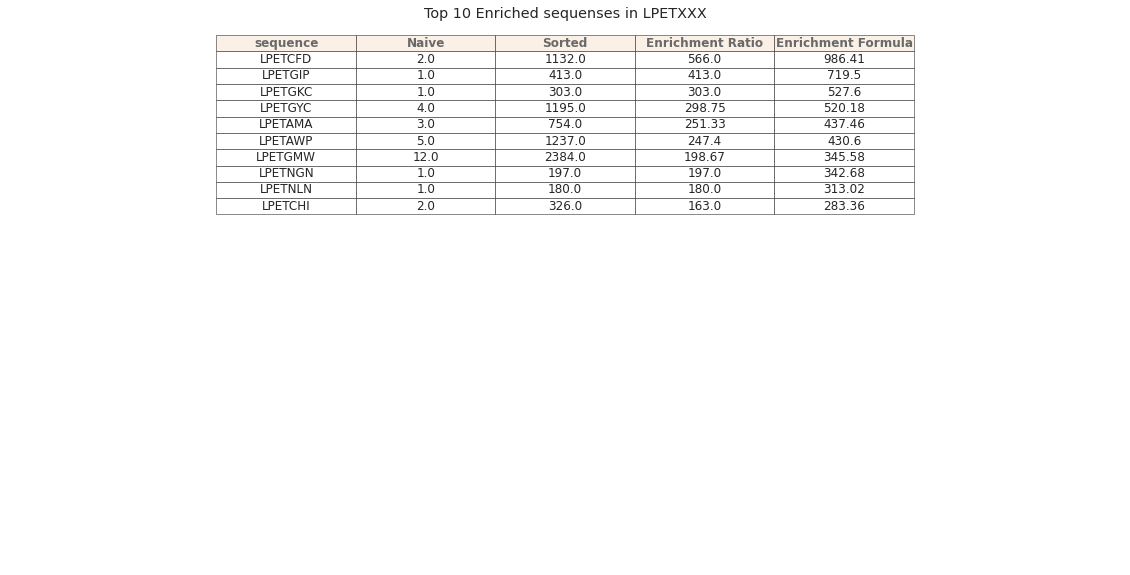

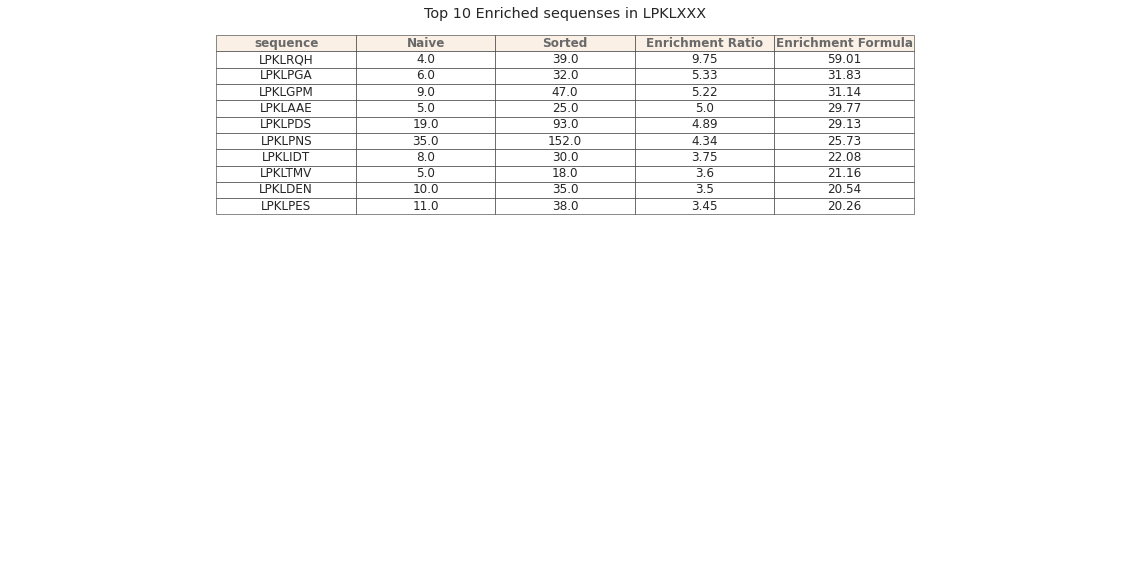

In [263]:
# Extract the first 10 rows


def Creat_top10(alltable , title , save_path) : 
    df_subset = alltable.head(10) #selecting the top 10 rows
    df_subset = df_subset.round(2)  # Round values to two decimal places
    df_subset = df_subset.drop(["Log Enrichment Ratio" , "Log Enrichment Formula"] , axis=1 )  # Round values to two decimal places

    # Create a table visualization using Matplotlib
    fig, ax = plt.subplots(figsize=(20,10))
    ax.axis('off')  # Turn off the axis
    table = ax.table(cellText=df_subset.values, colLabels=df_subset.columns,cellLoc='center', loc='upper center')

    for cell in table.get_celld().values():
        cell.set_width(0.125)  # Set the cell width
        cell.set_height(0.03)  # Set the cell height
 
    
    # Change the background cell color of column labels
    #for cell in table[0]:
     #   cell.set_facecolor('lightblue')  # Set the background color to light blue

    for i in range(5):
        table[0,i].set_text_props(weight='bold', color='dimgray')  #  Set first column label to bold and red
        table[0,i].set_facecolor('linen')  # Set the background color to light blue

        # Increase the font size of the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set the font size to 12

    plt.title(title)

    # Save the table as a PNG file
    plt.savefig(save_path, bbox_inches='tight',  dpi=200)

    plt.show()


Creat_top10( LPETEnrichment, "Top 10 Enriched sequenses in LPETXXX" , "Top 10 Enriched sequenses in LPET.PNG")
Creat_top10( LPKLEnrichment_filter, "Top 10 Enriched sequenses in LPKLXXX" , "Top 10 Enriched sequenses in LPKL.PNG")


# Extra Sequnces


In [75]:
#extra
#convert to fasta
Convert_TXT_to_Fasta("Extra.txt","Extra.fasta")
#convert to protein alphabet
print ("Translating Extra from DNA to Protein...")
from Bio.SeqRecord import SeqRecord
def translation(nuc):
	return SeqRecord(seq=nuc.seq.translate(), id = nuc.id)

from Bio import SeqIO
proteins = (translation(nuc_rec) for nuc_rec in SeqIO.parse("Extra.fasta",'fasta'))
SeqIO.write(proteins, 'ProtExtra.fasta','fasta')
print ("Done.")
#open it
ExtraData  = read_fasta('ProtExtra.fasta', columns=["id","sequence_length", "sequence"])

ExtraData


Converting Extra.txt  to FASTA...
Done.
Translating Extra from DNA to Protein...
Done.


,id,sequence_length,sequence
0,1,50,Q*IL*IARRLKVDTVVTITIITAVCRKPCGWDPTHTMFQITLVRDE...
1,2,50,LWMVAMMVVIIPSRTV*LLTSFPVRRAIMFMLVSWFGLTLPLLNAA...
2,3,50,KHQELSFE*THINKQN*YRCNYCVALASSP*SPVYWLLRQERLTRT...
3,4,50,KHQELSFE*THITIRRVRTNQRNLEHRMGRIRR*RFPADCRDDGDG...
4,5,50,KHQELSFE*THINKQN*YRCNYCVALASSP*SPVYWLLRQERLTRT...
...,...,...,...
1294607,1294608,50,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
1294608,1294609,50,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
1294609,1294610,50,LXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
1294610,1294611,50,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


In [76]:
ExtraDataClean = ExtraData.loc[:, ['sequence_length' , 'sequence']]


ExtraDataClean2 = ExtraDataClean.groupby(ExtraDataClean.columns.tolist(), as_index=False).size()
ExtraDataClean2.sort_values(by= "size", ascending= False, inplace=True)
ExtraDataClean2

,sequence_length,sequence,size
128571,50,KHQELSFE*THINKQN*YRCNYCVALASSP*SPVYWLLRQERLTRT...,790582
212191,50,NTKNLVSNKHT*TNKTSIDATIALL*HLLRNRQCIGCCGRKDLQER...,9625
126280,50,KHQELSFE*THINKQN*YRCNYCVALASSP*SPVYWLETEVPHGLL...,6636
283131,50,TPRT*FRINTHKQTKLVSMQLLRCFSIFSVIASVLAAAAGKTYKNG...,5884
73683,50,HQELSFE*THINKQN*YRCNYCVALASSP*SPVYWLLRQERLTRTV...,3203
...,...,...,...
105982,50,KHQELSFE*THINKQN*RNLEHRMGRIRSPRFPADCRDDGDGDYRI...,1
105983,50,KHQELSFE*THINKQN*RNLEHRMGRIRSSSVSADCRDDGDGDYLI...,1
105984,50,KHQELSFE*THINKQN*RNLEHRMGRIRTSTVSADCRDDGDGDYRI...,1
105985,50,KHQELSFE*THINKQN*RNLEHRMGRIRWCSVSADCRDDGDGDYRI...,1


sequence 1 : 790582 time
AAACACCAAGAACTTAGTTTCGAATAAACACACATAAACAAACAAAACTAGTATCGATGCAACTATTGAGTTGCTTTAGCATCTTCTCCGTAATCGCCAGTGTATTGGCTGCTGCGGCAGGAAAGACTTACAAGAACGGTAAGACTAATGG

sequence 2 : 6636 time
AAACACCAAGAACTTAGTTTCGAATAAACACACATAAACAAACAAAACTAGTATCGATGCAACTATTGAGTTGCTTTAGCATCTTCTCCGTAATCGCCAGTGTATTGGCTTGAGACAGAGGTACCCCATGGGTTGCTAGCCAGGTCTCATG

In [89]:
#LPKL Version 2
        #In this set of calculation From the sorted data for LPKLXXX, sequences that are LPKLP are removed. 

In [126]:
#positions 
#creating a dataframe for prime positions with counting of aminos Naive




#LPKL
dn2 = count_position(LPKL , "Naive" )
ds2new = count_position(LPKL_new , "Sorted" )


# Divide DataFrames using the `/` operator
    #LPKL POSITIONS 
LPKL_POS_new = ds2new/dn2
LPKL_POSF_new = (ds2new/ df_sorted_LPKL_filtered.shape[0]) / (dn2/ dataLPKL_naive.shape[0]) - 1


#Save to files

LPKL_POS_new.to_csv('Prime positions_LPKLPXT Filtered_ Table Enrichment Ratio LPKL.csv', index=True)
LPKL_POSF_new.to_csv('Prime positions_LPKLPXT Filtered_ Table Enrichment Formula LPKL.csv', index=True)


LPKL_POS_new = LPKL_POS_new.T
LPKL_POSF_new=LPKL_POSF_new.T



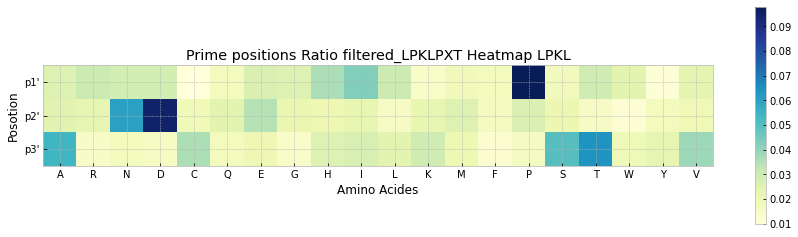

In [127]:

# Displaying dataframe as an heatmap LPKL
# with diverging colourmap as YlGnBu
plt.figure(figsize=(15,4))



plt.grid(which="minor", color="w", linestyle='-', linewidth=3)
    
plt.imshow(LPKL_POS_new, cmap ="YlGnBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
plt.xlabel('Amino Acides')
# according to dataframe
plt.xticks(range(20), LPKL_POS_new.columns)
  
# Assigning labels of y-axis 
plt.ylabel('Posotion')
# according to dataframe
plt.yticks(range(len(LPKL_POS_new)), LPKL_POS_new.index)
plt.title('Prime positions Ratio filtered_LPKLPXT Heatmap LPKL')

plt.savefig('Prime positions ratio Heatmap LPKL FilteredLPKLPXT .png')

# Displaying the figure
plt.show()

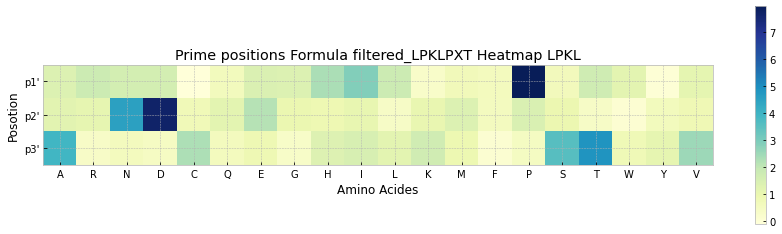

In [128]:

# Displaying dataframe as an heatmap LPKL
# with diverging colourmap as YlGnBu
plt.figure(figsize=(15,4))



plt.grid(which="minor", color="w", linestyle='-', linewidth=3)
    
plt.imshow(LPKL_POSF_new, cmap ="YlGnBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
plt.xlabel('Amino Acides')
# according to dataframe
plt.xticks(range(20), LPKL_POSF_new.columns)
  
# Assigning labels of y-axis 
plt.ylabel('Posotion')
# according to dataframe
plt.yticks(range(len(LPKL_POSF_new)), LPKL_POSF_new.index)
plt.title('Prime positions Formula filtered_LPKLPXT Heatmap LPKL')

plt.savefig('Prime positions Formula Heatmap LPKL FilteredLPKLPXT .png')

# Displaying the figure
plt.show()